In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("BankChurners.csv",index_col="CLIENTNUM")

In [3]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [5]:
df["Income"] = np.select([
    (df["Income_Category"] == "Less than $40K"),
    (df["Income_Category"] == "$40K - $60K" ),
    (df["Income_Category"] == "$60K - $80K"),
    (df["Income_Category"] == "$80K - $120K" ),
    (df["Income_Category"] == "$120K +" )
    ],
    [1,2,3,4,5],
    default=0
)

In [6]:
df["Income"].value_counts()

1    3561
2    1790
4    1535
3    1402
0    1112
5     727
Name: Income, dtype: int64

In [7]:
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [8]:
df["Attrition_Flag"] = np.select([
    (df["Attrition_Flag"] == "Existing Customer"),
    (df["Attrition_Flag"] == "Attrited Customer" ),
    ],
    [1,0],
)

In [9]:
df.Attrition_Flag.value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [10]:
df.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [11]:
df["Education_Level"] = np.select([
    (df["Education_Level"] == "Uneducated"),
    (df["Education_Level"] == "High School"),
    (df["Education_Level"] == "College"),
    (df["Education_Level"] == "Graduate"),
    (df["Education_Level"] == "Post-Graduate"),
    (df["Education_Level"] == "Doctorate")
    ],
    [1,2,3,4,5,6],
    default=0
)

In [12]:
df.Education_Level.value_counts()

4    3128
2    2013
0    1519
1    1487
3    1013
5     516
6     451
Name: Education_Level, dtype: int64

In [13]:
df.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [14]:
df["Card_Category"] = np.select([
    (df["Card_Category"] == "Blue"),
    (df["Card_Category"] == "Silver"),
    (df["Card_Category"] == "Gold"),
    (df["Card_Category"] == "Platinum")
    ],
    [1,2,3,4],
)

In [15]:
df.Card_Category.value_counts()

1    9436
2     555
3     116
4      20
Name: Card_Category, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int32  
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  int32  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

In [17]:
df = df.drop("Income_Category",axis=1)

In [18]:
df = pd.get_dummies(df,drop_first=True,columns=["Marital_Status","Gender"])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  int32  
 4   Card_Category             10127 non-null  int32  
 5   Months_on_book            10127 non-null  int64  
 6   Total_Relationship_Count  10127 non-null  int64  
 7   Months_Inactive_12_mon    10127 non-null  int64  
 8   Contacts_Count_12_mon     10127 non-null  int64  
 9   Credit_Limit              10127 non-null  float64
 10  Total_Revolving_Bal       10127 non-null  int64  
 11  Avg_Open_To_Buy           10127 non-null  float64
 12  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 13  Total_Trans_Amt           10127 non-null  int64  

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns = df.columns)
df_scaled.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Gender_M
0,1.0,0.404255,0.6,0.333333,0.0,0.604651,0.8,0.166667,0.500000,0.340190,...,0.392994,0.035273,0.248062,0.437534,0.061061,0.6,1.0,0.0,0.0,1.0
1,1.0,0.489362,1.0,0.666667,0.0,0.720930,1.0,0.166667,0.333333,0.206112,...,0.453636,0.043452,0.178295,1.000000,0.105105,0.2,0.0,1.0,0.0,0.0
2,1.0,0.531915,0.6,0.666667,0.0,0.534884,0.6,0.166667,0.000000,0.059850,...,0.763615,0.076611,0.077519,0.628164,0.000000,0.8,1.0,0.0,0.0,1.0
3,1.0,0.297872,0.8,0.333333,0.0,0.488372,0.4,0.666667,0.166667,0.056676,...,0.413600,0.036775,0.077519,0.628164,0.760761,0.2,0.0,0.0,1.0,0.0
4,1.0,0.297872,0.6,0.166667,0.0,0.186047,0.8,0.166667,0.000000,0.099091,...,0.640271,0.017025,0.139535,0.673129,0.000000,0.6,1.0,0.0,0.0,1.0


In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

arr = range(2,11)
inertia_list = []
silhouette_list=[]

for i in arr:
    kmeans = KMeans(n_clusters= i, random_state=42)
    kmeans.fit(df_scaled)
    inertia_list.append( kmeans.inertia_ )
    silhouette_list.append( silhouette_score(df_scaled, kmeans.labels_) )

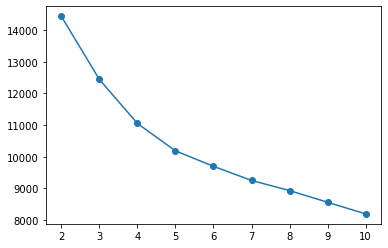

In [28]:
import matplotlib.pyplot as plt
plt.plot(arr,inertia_list, marker="o" )

Elbow Method does not provide clear insight, we can guess "5" approximately

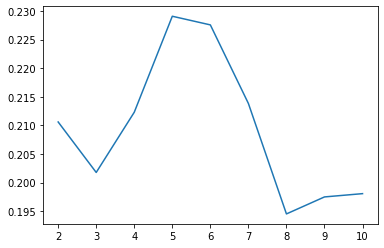

In [29]:
plt.plot(arr, silhouette_list)

Here we can see clearly 5 is the best *k value*

In [25]:
#  Rerunning with the selected best k value
cluster = KMeans(n_clusters=5, max_iter=1000)

cluster.fit(df_scaled)

KMeans(max_iter=1000, n_clusters=5)

In [35]:
pd.set_option('max_columns', 25)

In [36]:
#  Printing out cluster centers
df_centers = pd.DataFrame(cluster.cluster_centers_, columns = df.columns)
df_centers.sort_values("Attrition_Flag")

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Gender_M
3,0.820706,0.428155,0.457224,0.424235,0.024941,0.528350,0.553318,0.394353,0.409255,0.114475,0.442743,0.119013,0.219163,0.220267,0.453658,0.191130,0.332651,0.198024,-1.387779e-15,1.000000e+00,1.942890e-16,-1.276756e-15
4,0.831905,0.446618,0.468707,0.443152,0.013600,0.545055,0.567442,0.389433,0.397933,0.096989,0.455135,0.101350,0.224889,0.200213,0.416024,0.192892,0.354351,0.198776,1.000000e+00,-1.443290e-15,1.526557e-16,-1.498801e-15
1,0.832487,0.410442,0.491226,0.436548,0.028040,0.514984,0.562292,0.389050,0.401982,0.195726,0.459788,0.195642,0.221028,0.228210,0.442934,0.190895,0.274783,0.384336,2.775558e-16,-4.996004e-16,5.431472e-01,4.329224e-01
0,0.841942,0.431818,0.457025,0.431560,0.045282,0.535472,0.558988,0.389549,0.413567,0.386671,0.451629,0.379240,0.221793,0.235517,0.440307,0.190807,0.176589,0.662707,-1.276756e-15,9.390496e-01,9.714451e-17,1.000000e+00
2,0.867174,0.435200,0.478265,0.432245,0.031157,0.534166,0.569052,0.388342,0.422257,0.314362,0.498098,0.306550,0.230050,0.207769,0.384473,0.192508,0.219335,0.672361,1.000000e+00,-7.771561e-16,-8.326673e-17,1.000000e+00


While our 2nd cluster has the highest Attrition Flag, our 3rd cluster has the lowest.

We can call our 2nd cluster loyal customers. Our royal customers have highest Contacts Count, Total Revolving Balance, Total Transaction Amount Q4/Q1 and Income. 

Royal customers also tend to have high Total Relationship Count, Credit Limit and Avg Open to Buy Credit.

In contrary our 3rd cluster has more the leaving customers.



Our leaving customers generally have low Total Revolving Balance, Credit Limit and Avg Open to Buy Credit and Income.

They also have high Total Transaction Count, Average Card Utilization Ratio.